In [1]:
import numpy as np
from matplotlib import pyplot as plt
import keras
from keras.datasets import mnist

from DNN import DNN
from utils import show_img, idx2char
import scipy.io as sio

Using TensorFlow backend.


# Load & pre-process data

In [2]:
# Load data
(X, Y), (X_test, Y_test) = mnist.load_data()
num_class = 10
input_shape = (28, 28)

# Reshape
X = X.reshape((-1, 28*28)) / 255
X_test = X_test.reshape((-1, 28*28)) / 255

Y = keras.utils.to_categorical(Y)
Y_test = keras.utils.to_categorical(Y_test)

# Shuffle
p = np.random.permutation(60000)
X = X[p,]
Y = Y[p,]

print(f"X: {X.shape}\nY: {Y.shape}\ninput_shape: {input_shape}")

X: (60000, 784)
Y: (60000, 10)
input_shape: (28, 28)


# Training

In [3]:
dnn = DNN(n_h=[np.prod(input_shape), 64, 32, num_class])

100%|██████████| 10/10 [00:10<00:00,  1.05it/s]


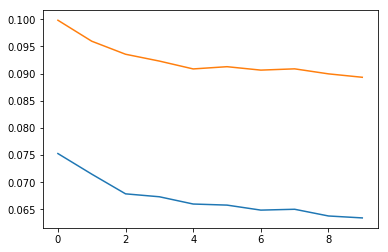

In [4]:
dnn.train(X, epochs=10, lr=0.03)

Loss: 0.629	Acc: 89.9
Loss: 0.53	Acc: 91.22
Loss: 0.487	Acc: 91.81
Loss: 0.458	Acc: 92.37
Loss: 0.436	Acc: 92.83
Loss: 0.418	Acc: 93.03
Loss: 0.403	Acc: 93.28
Loss: 0.39	Acc: 93.37
Loss: 0.38	Acc: 93.47
Loss: 0.37	Acc: 93.69


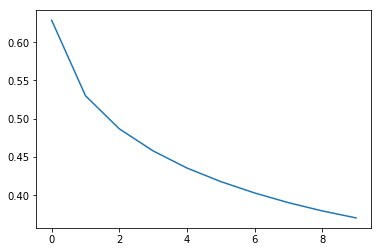

In [5]:
dnn.train_supervised(X, Y, epochs=10, batch_size=16, lr=3, validation_data=(X_test, Y_test))

# Create image

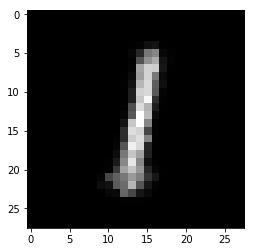

In [6]:
noise = np.random.normal(size=(1, np.prod(input_shape)))
output = noise
n_iter = 50

for _ in range(n_iter):
    output = dnn.backward(dnn.forward(output))

img = np.squeeze(output.reshape(input_shape))

show_img(img)

# Visualization (classification)

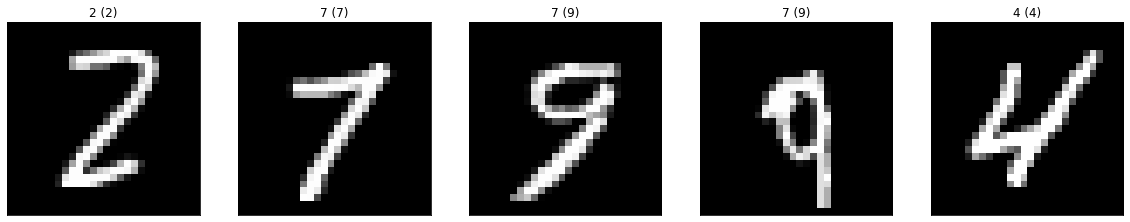

In [7]:
n_images = 5

# Sample images
sample_idx = np.random.choice(X_test.shape[0], n_images)
x_sample = X_test[sample_idx]
y_sample = Y_test[sample_idx]

# Run prediction
y_hat = dnn.forward_full(x_sample)

# Visualize
plt.figure(figsize=(20, 10))
for i in range(n_images):
    ax = plt.subplot(1, n_images, i+1)
    
    plt.imshow(x_sample[i].reshape(input_shape), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f"{idx2char(np.argmax(y_hat[i]))} ({idx2char(np.argmax(y_sample[i]))})")